In [104]:
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

nb_samples = 1000

X = np.zeros(shape=(nb_samples, 2), dtype=np.float32)
Y = np.zeros(shape=(nb_samples,), dtype=np.float32)

t = 15.0 * np.random.uniform(0.0, 1.0, size=(int(nb_samples / 2), 1))

X[0:int(nb_samples / 2), :] = t * np.hstack([-np.cos(t), np.sin(t)]) + \
                              np.random.uniform(0.0, 1.8, size=(int(nb_samples / 2), 2))
Y[0:int(nb_samples / 2)] = 0

X[int(nb_samples / 2):, :] = t * np.hstack([np.cos(t), -np.sin(t)]) + \
                             np.random.uniform(0.0, 1.8, size=(int(nb_samples / 2), 2))
Y[int(nb_samples / 2):] = 1

ss = StandardScaler()
X = ss.fit_transform(X)

X, Y = shuffle(X, Y, random_state=1000)

def plot_surface_model(model):    

    Xm = np.linspace(min(X[:, 0]), max(X[:, 0]), 1000)
    Ym = np.linspace(min(X[:, 1]), max(X[:, 1]), 1000)
    Xmg, Ymg = np.meshgrid(Xm, Ym)
    X_eval = np.vstack([Xmg.ravel(), Ymg.ravel()]).T
    X_eval = np.float32(X_eval)
    Y_eval_mlp = np.argmax(model.predict(X_eval), axis=1)

    plt.scatter(X_eval[:, 0], X_eval[:, 1], c=Y_eval_mlp)
    plt.show()

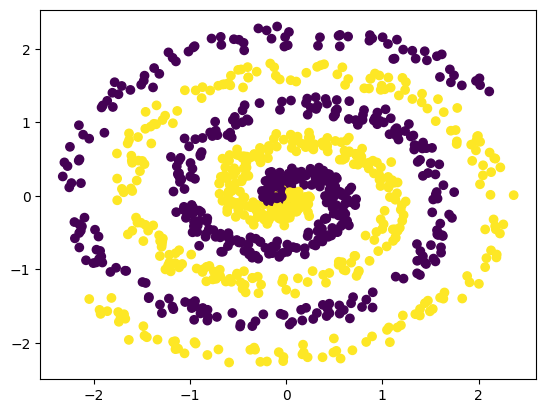

In [105]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

In [106]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X_train, X_test, Y_train, Y_test = \
    train_test_split(X, to_categorical(Y), test_size=0.2, random_state=1000, shuffle=False)

In [107]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import Input
from keras.optimizers import SGD

def build_model_alg_example():
    
    model = Sequential()

    model.add(Input(shape=(2,)))
    model.add(Dense(64))
    model.add(Activation('relu'))

    model.add(Dense(32))
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(Activation('relu'))

    model.add(Dense(2))
    model.add(Activation('softmax'))

    return model

In [108]:
from keras.optimizers import SGD

sgd_model = build_model_alg_example()

sgd = SGD(learning_rate=0.01, momentum=0.99, nesterov=True)

sgd_model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [109]:
history = sgd_model.fit(X_train, Y_train, 
          epochs=100, 
          batch_size=32,
          validation_data=(X_test, Y_test))

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5001 - loss: 0.7022 - val_accuracy: 0.4850 - val_loss: 0.6992
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5580 - loss: 0.6838 - val_accuracy: 0.5050 - val_loss: 0.6974
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5128 - loss: 0.6875 - val_accuracy: 0.5000 - val_loss: 0.7084
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5891 - loss: 0.6767 - val_accuracy: 0.4600 - val_loss: 0.6947
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5596 - loss: 0.6770 - val_accuracy: 0.5000 - val_loss: 0.7125
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5650 - loss: 0.6825 - val_accuracy: 0.5500 - val_loss: 0.6947
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5802 - loss: 0.6692 - val_accuracy: 0.5700 - val_loss: 0.6928
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6247 - loss: 0.6663 - val_accuracy: 0.5400 - 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


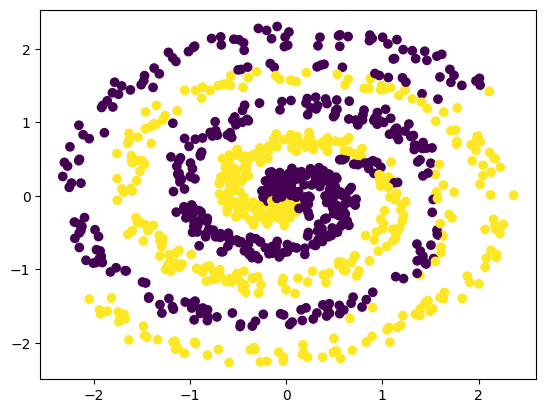

In [110]:
Y_eval_mlp = np.argmax(sgd_model.predict(X), axis=1)

import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=Y_eval_mlp)
plt.show()

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 74s 2ms/step


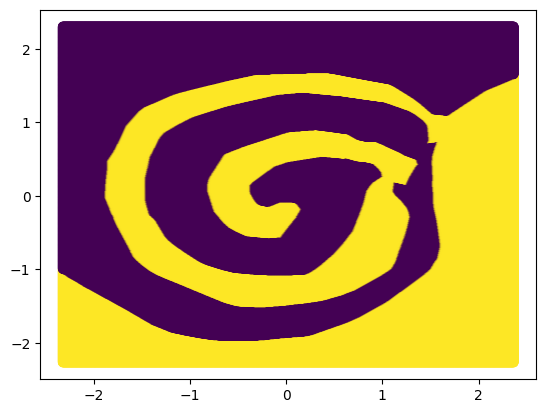

In [111]:
plot_surface_model(sgd_model)

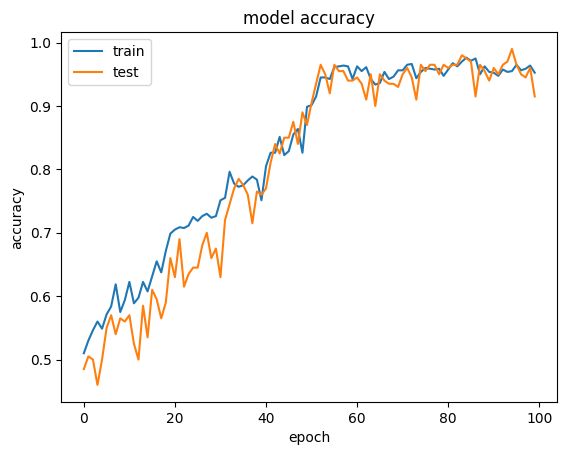

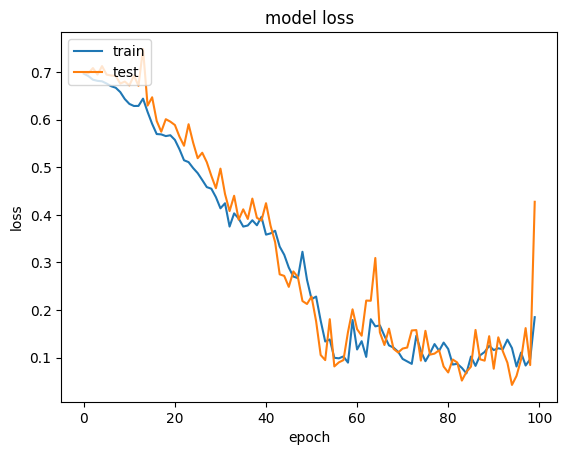

In [112]:
# list all data in history
#print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## ADV Deep Learning

### Filtro Laplaciando

In [113]:
#!pip install pooch
from scipy.datasets import face

img = face(gray=True)

In [114]:
img

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

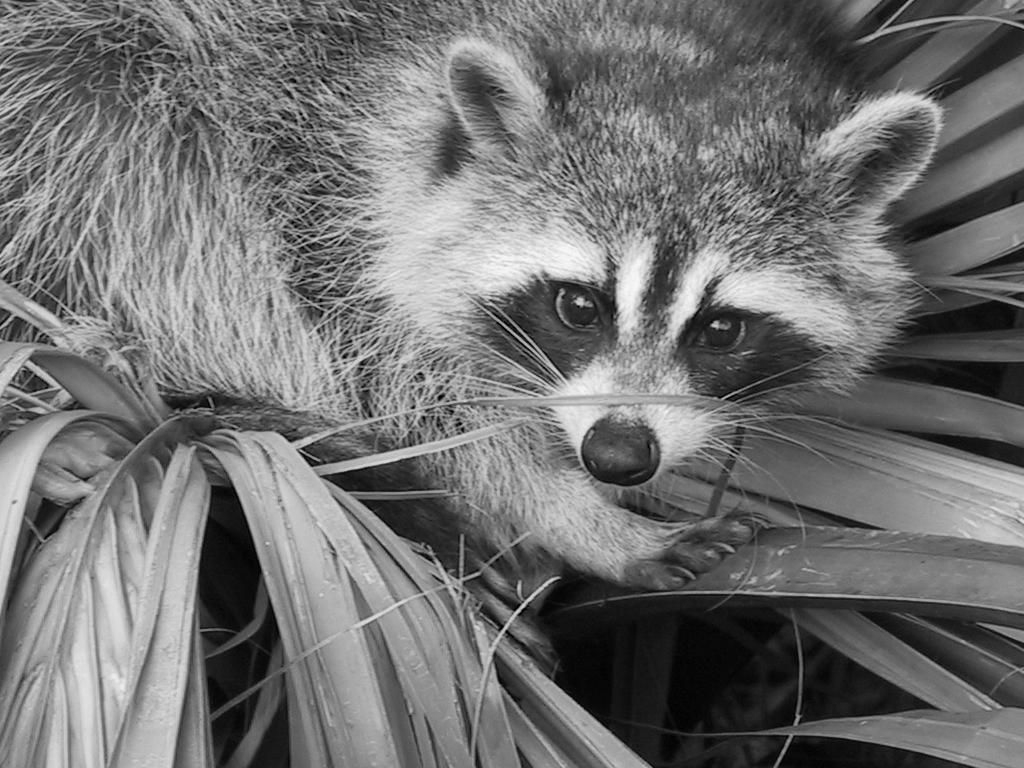

In [115]:
from PIL import Image

Image.fromarray(img)

In [116]:
import numpy as np

kernel = np.array(
    [[0, 1, 0],
     [1, -4, 0],
     [0, 1, 0]], 
     dtype=np.float32)

cfilter = np.zeros((3, 3, 1, 1), dtype=np.float32)
cfilter[:, :, 0, 0] = kernel

In [117]:
import tensorflow as tf
import numpy as np

# Define the input tensor
x = tf.constant(img.reshape((1, 768, 1024, 1)), dtype=tf.float32)
f = tf.constant(cfilter, dtype=tf.float32)

# Define the convolution operation
@tf.function
def apply_convolution(x, f):
    return tf.nn.conv2d(x, f, strides=[1, 1, 1, 1], padding='SAME')

# Run the convolution
c_img = apply_convolution(x, f)
n_img = tf.reshape(c_img, (768, 1024)).numpy()

print(n_img)

[[-373. -302. -327. ... -242. -263. -273.]
 [-150. -115. -134. ... -125. -155. -168.]
 [-111.  -86. -116. ... -132. -159. -172.]
 ...
 [-189. -106. -131. ... -144. -142. -144.]
 [-184. -113. -141. ... -142. -141. -143.]
 [-282. -226. -250. ... -282. -280. -277.]]


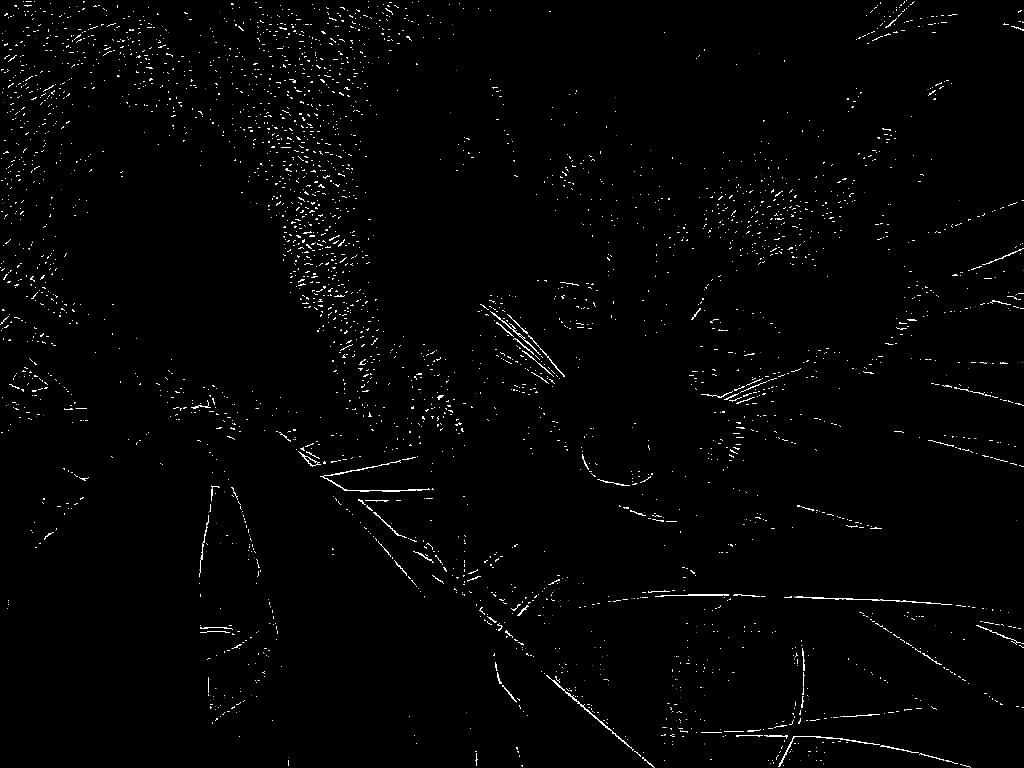

In [118]:
im = Image.fromarray(n_img* 100) 
if im.mode != 'RGB':
    im = im.convert('RGB')
im

### Deep Convolutional Network (DCN)

In [9]:
from keras.datasets import mnist
import tensorflow as tf
import numpy as np

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

width = height = X_train.shape[1]

X_train = X_train.reshape((X_train.shape[0], width, height, 1)).astype(np.float32) / 255.0
X_test = X_test.reshape((X_test.shape[0], width, height, 1)).astype(np.float32) / 255.0

In [10]:
from keras.utils import to_categorical

Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, AveragePooling2D, Flatten
from keras import Input

model = Sequential()

model.add(Input(shape=(width, height, 1)))
model.add(Dropout(0.25, seed=1000))

model.add(Conv2D(16, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.5, seed=1000))

model.add(Conv2D(16, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.5, seed=1000))

model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))

model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.5, seed=1000)) # BatchNormalization()

model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5, seed=1000))

model.add(Dense(10))
model.add(Activation('softmax'))

In [6]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001, decay=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

D:\Backup\OneDrive - puc-rio.br\Jupyter\venvs\mlclass\lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [12]:
from keras.optimizers import Adam

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,  # Adjust decay steps based on your needs
    decay_rate=1-1e-5,    # Adjust decay rate based on your needs
    staircase=True      # If True, learning rate decreases in discrete intervals
)

model.compile(optimizer=Adam(learning_rate=lr_schedule),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(X_train, Y_train,
                    epochs=10,
                    batch_size=256,
                    validation_data=(X_test, Y_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 94ms/step - accuracy: 0.7188 - loss: 0.8523 - val_accuracy: 0.9631 - val_loss: 0.1230
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 98ms/step - accuracy: 0.9684 - loss: 0.1054 - val_accuracy: 0.9788 - val_loss: 0.0673
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 94ms/step - accuracy: 0.9803 - loss: 0.0644 - val_accuracy: 0.9868 - val_loss: 0.0423
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step - accuracy: 0.9850 - loss: 0.0491 - val_accuracy: 0.9893 - val_loss: 0.0342
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 39s 87ms/step - accuracy: 0.9875 - loss: 0.0390 - val_accuracy: 0.9854 - val_loss: 0.0420
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 98ms/step - accuracy: 0.9904 - loss: 0.0327 - val_accuracy: 0.9886 - val_loss: 0.0353
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 102ms/step - accuracy: 0.9910 - loss: 0.0288 - val_accuracy: 0.9896 - val_loss: 0.0364
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 113ms/step - accuracy: 0.9925 - loss: 0.0245 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


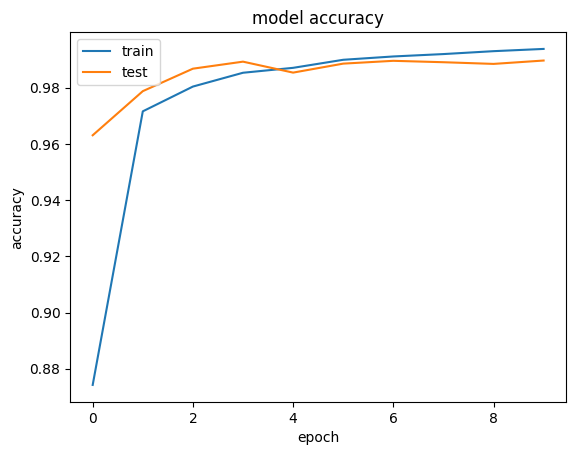

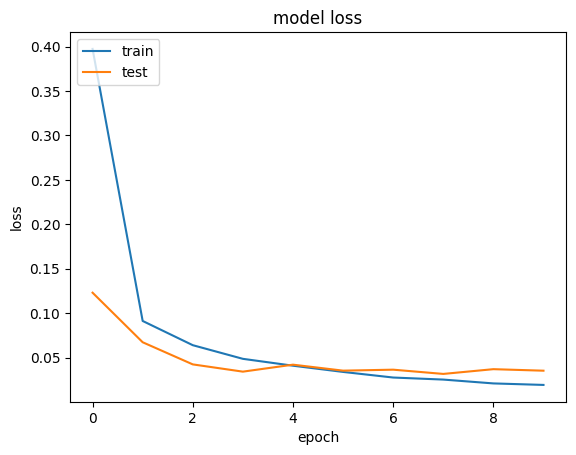

In [14]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [135]:
from sklearn import metrics
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [136]:
matrix = metrics.confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
matrix

array([[ 976,    0,    0,    0,    0,    0,    2,    1,    1,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [   5,    1, 1024,    0,    0,    0,    0,    1,    1,    0],
       [   0,    0,    0, 1001,    0,    2,    0,    3,    3,    1],
       [   0,    0,    0,    0,  973,    0,    1,    0,    0,    8],
       [   2,    0,    0,    2,    0,  883,    3,    0,    0,    2],
       [   6,    4,    0,    0,    3,    0,  943,    0,    2,    0],
       [   0,    3,    6,    2,    0,    0,    0, 1014,    1,    2],
       [   7,    1,    4,    2,    2,    2,    1,    2,  948,    5],
       [   0,    5,    0,    0,    4,    2,    0,    6,    3,  989]],
      dtype=int64)

### Exemplo 2

In [137]:
import numpy as np

from keras.datasets import mnist
from keras.utils import to_categorical

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

width = height = X_train.shape[1]

X_train = X_train.reshape((X_train.shape[0], width, height, 1)).astype(np.float32) / 255.0
X_test = X_test.reshape((X_test.shape[0], width, height, 1)).astype(np.float32) / 255.0

Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

In [140]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, AveragePooling2D, Flatten
from keras.optimizers import Adam
from keras import Input

model = Sequential()

model.add(Input(shape=(width, height, 1)))
model.add(Dropout(0.25, seed=1000))

model.add(Conv2D(16, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.5, seed=1000))

model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.5, seed=1000))

model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))

model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.5, seed=1000))

model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())

model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5, seed=1000))

model.add(Dense(10))
model.add(Activation('softmax'))

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000, 
    decay_rate=1-1e-5,
    staircase=True    
)

model.compile(optimizer=Adam(learning_rate=lr_schedule),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [141]:
history = model.fit(X_train, Y_train,
                    epochs=10,
                    batch_size=256,
                    validation_data=(X_test, Y_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 70s 277ms/step - accuracy: 0.7064 - loss: 0.8550 - val_accuracy: 0.9678 - val_loss: 0.1022
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 76s 324ms/step - accuracy: 0.9502 - loss: 0.1620 - val_accuracy: 0.9779 - val_loss: 0.0681
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 86s 340ms/step - accuracy: 0.9623 - loss: 0.1213 - val_accuracy: 0.9833 - val_loss: 0.0480
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 70s 299ms/step - accuracy: 0.9695 - loss: 0.0984 - val_accuracy: 0.9881 - val_loss: 0.0402
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 61s 259ms/step - accuracy: 0.9750 - loss: 0.0794 - val_accuracy: 0.9893 - val_loss: 0.0328
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 260ms/step - accuracy: 0.9761 - loss: 0.0723 - val_accuracy: 0.9900 - val_loss: 0.0336
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 85s 273ms/step - accuracy: 0.9781 - loss: 0.0686 - val_accuracy: 0.9905 - val_loss: 0.0271
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 83s 277ms/step - accuracy: 0.9816 - loss: 0

### Exemplo Dropout

In [142]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras import Input

model = Sequential()

features = width * height

model.add(Input(shape=(features,)))
model.add(Dense(2048))
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=1000, 
    decay_rate=1-1e-6,
    staircase=True    
)

model.compile(optimizer=Adam(learning_rate=lr_schedule),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [143]:
flat_X_train = np.array([matrix.flatten() for matrix in X_train])
flat_X_test = np.array([matrix.flatten() for matrix in X_test])

In [144]:
print("Input data shape:", flat_X_train.shape)  # X
print("Labels shape:", Y_train.shape)    # y

Input data shape: (60000, 784)
Labels shape: (60000, 10)


In [145]:
history = model.fit(flat_X_train, Y_train,
                    epochs=10,
                    batch_size=256,
                    validation_data=(flat_X_test, Y_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 102ms/step - accuracy: 0.8106 - loss: 0.7796 - val_accuracy: 0.9522 - val_loss: 0.1667
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 108ms/step - accuracy: 0.9555 - loss: 0.1488 - val_accuracy: 0.9629 - val_loss: 0.1223
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 99ms/step - accuracy: 0.9722 - loss: 0.0934 - val_accuracy: 0.9712 - val_loss: 0.0922
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 98ms/step - accuracy: 0.9810 - loss: 0.0627 - val_accuracy: 0.9769 - val_loss: 0.0739
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step - accuracy: 0.9879 - loss: 0.0442 - val_accuracy: 0.9787 - val_loss: 0.0708
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 96ms/step - accuracy: 0.9920 - loss: 0.0309 - val_accuracy: 0.9725 - val_loss: 0.0826
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 100ms/step - accuracy: 0.9939 - loss: 0.0239 - val_accuracy: 0.9809 - val_loss: 0.0605
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step - accuracy: 0.9961 - loss: 0.0169

### Exemplo Dropout 2

In [146]:
from keras.constraints import MaxNorm
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras import Input

model = Sequential()

model.add(Input(shape=(width * height,)))
model.add(Dropout(0.25, seed=1000))

model.add(Dense(2048, kernel_initializer='uniform', kernel_constraint=MaxNorm(2.0)))
model.add(Activation('relu'))
model.add(Dropout(0.5, seed=1000))

model.add(Dense(1024, kernel_initializer='uniform', kernel_constraint=MaxNorm(2.0)))
model.add(Activation('relu'))
model.add(Dropout(0.5, seed=1000))

model.add(Dense(1024, kernel_initializer='uniform', kernel_constraint=MaxNorm(2.0)))
model.add(Activation('relu'))
model.add(Dropout(0.5, seed=1000))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer=SGD(learning_rate=0.1, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [147]:
history = model.fit(flat_X_train, Y_train,
                    epochs=10,
                    batch_size=256,
                    validation_data=(flat_X_test, Y_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 94ms/step - accuracy: 0.7126 - loss: 0.8592 - val_accuracy: 0.9479 - val_loss: 0.1726
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - accuracy: 0.9226 - loss: 0.2482 - val_accuracy: 0.9655 - val_loss: 0.1123
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 95ms/step - accuracy: 0.9432 - loss: 0.1919 - val_accuracy: 0.9687 - val_loss: 0.1007
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 94ms/step - accuracy: 0.9484 - loss: 0.1682 - val_accuracy: 0.9737 - val_loss: 0.0852
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 90ms/step - accuracy: 0.9533 - loss: 0.1506 - val_accuracy: 0.9772 - val_loss: 0.0762
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 93ms/step - accuracy: 0.9585 - loss: 0.1351 - val_accuracy: 0.9777 - val_loss: 0.0734
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 94ms/step - accuracy: 0.9609 - loss: 0.1270 - val_accuracy: 0.9758 - val_loss: 0.0759
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 95ms/step - accuracy: 0.9634 - loss: 0.1162 - 

### Exemplo com Batch Normalization

In [148]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization
from keras.optimizers import Adam
from keras import Input

model = Sequential()

model.add(Input(shape=(width * height,)))
model.add(Dense(2048))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation('softmax'))

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000, 
    decay_rate=1-1e-6,
    staircase=True    
)

model.compile(optimizer=Adam(learning_rate=lr_schedule),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [149]:
history = model.fit(flat_X_train, Y_train,
                    epochs=10,
                    batch_size=256,
                    validation_data=(flat_X_test, Y_test))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 106ms/step - accuracy: 0.9143 - loss: 0.5439 - val_accuracy: 0.9753 - val_loss: 0.4193
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 105ms/step - accuracy: 0.9842 - loss: 0.2178 - val_accuracy: 0.9814 - val_loss: 0.1693
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 104ms/step - accuracy: 0.9906 - loss: 0.1380 - val_accuracy: 0.9781 - val_loss: 0.1491
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 102ms/step - accuracy: 0.9938 - loss: 0.0961 - val_accuracy: 0.9843 - val_loss: 0.0986
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 108ms/step - accuracy: 0.9960 - loss: 0.0689 - val_accuracy: 0.9820 - val_loss: 0.0919
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 107ms/step - accuracy: 0.9962 - loss: 0.0542 - val_accuracy: 0.9819 - val_loss: 0.0890
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 110ms/step - accuracy: 0.9975 - loss: 0.0399 - val_accuracy: 0.9819 - val_loss: 0.0829
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 120ms/step - accuracy: 0.9979 - loss: 0

### Exemplo de uma rede convolucional profunda com Keras e aumento de dados

In [150]:
from keras.datasets import fashion_mnist

(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

In [151]:
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

nb_classes = 10
train_batch_size = 256
test_batch_size = 100

train_idg = ImageDataGenerator(rescale=1.0 / 255.0,
                               samplewise_center=True,
                               samplewise_std_normalization=True,
                               horizontal_flip=True,
                               rotation_range=10.0,
                               shear_range=np.pi / 12.0,
                               zoom_range=0.25)

train_dg = train_idg.flow(x=np.expand_dims(X_train, axis=3),
                          y=to_categorical(Y_train, num_classes=nb_classes),
                          batch_size=train_batch_size,
                          shuffle=True,
                          seed=1000)

test_idg = ImageDataGenerator(rescale=1.0 / 255.0,
                              samplewise_center=True,
                              samplewise_std_normalization=True)

test_dg = train_idg.flow(x=np.expand_dims(X_test, axis=3),
                         y=to_categorical(Y_test, num_classes=nb_classes),
                         shuffle=False,
                         batch_size=test_batch_size,
                         seed=1000) 

In [154]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, LeakyReLU, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
from keras import Input

model = Sequential()

model.add(Input(shape=(X_train.shape[1], X_train.shape[2], 1)))
model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 padding='same'))

model.add(BatchNormalization())
model.add(LeakyReLU(negative_slope=0.1))

model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 padding='same'))

model.add(BatchNormalization())
model.add(LeakyReLU(negative_slope=0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 padding='same'))

model.add(BatchNormalization())
model.add(LeakyReLU(negative_slope=0.1))

model.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 padding='same'))

model.add(BatchNormalization())
model.add(LeakyReLU(negative_slope=0.1))

model.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 padding='same'))

model.add(BatchNormalization())
model.add(LeakyReLU(negative_slope=0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=1024))
model.add(BatchNormalization())
model.add(LeakyReLU(negative_slope=0.1))

model.add(Dense(units=1024))
model.add(BatchNormalization())
model.add(LeakyReLU(negative_slope=0.1))

model.add(Dense(units=nb_classes))
model.add(Activation('softmax'))

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=1000, 
    decay_rate=1-1e-5,
    staircase=True    
)

model.compile(optimizer=Adam(learning_rate=lr_schedule),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [155]:
from keras.callbacks import ReduceLROnPlateau

nb_epochs = 10
steps_per_epoch = 1500

history = model.fit(train_dg,
                              epochs=nb_epochs,
                              steps_per_epoch=steps_per_epoch,
                              validation_data=test_dg,
                              validation_steps=int(X_test.shape[0] / test_batch_size),
                              callbacks=[
                                 ReduceLROnPlateau(factor=0.1, patience=1, cooldown=1, min_lr=1e-6)
                              ])


Epoch 1/10
  10/1500 ━━━━━━━━━━━━━━━━━━━━ 31:00 1s/step - accuracy: 0.4228 - loss: 1.7487

KeyboardInterrupt: 